In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# Step 1: Read the CSV files
n_gaussians_file = 'data/n_gauss.csv'  # Replace with your file path
ssim_file = 'data/ssim.csv'  # Replace with your file path

# Read the data into pandas DataFrames
df_n_gauss = pd.read_csv(n_gaussians_file)
df_ssim = pd.read_csv(ssim_file)

In [50]:

# Step 2: Identify the runs (run IDs) based on column names
run_ids_ssim = [col.split(' - ')[0] for col in df_ssim.columns if 'ssim' in col]
run_ids_n_gauss = [col.split(' - ')[0] for col in df_n_gauss.columns if 'n_gaussians' in col]


In [51]:
# Step 3: Combine SSIM and n_gaussians data based on run IDs
data = []

for run_id in run_ids_ssim:
    if run_id in run_ids_n_gauss:
        # Extract the ssim and n_gaussians columns for the current run
        ssim_col = f"{run_id} - train_iter/candidate_0/ssim"
        n_gaussians_col = f"{run_id} - densification_step/candidate_0/n_gaussians"
        
        # Find the last non-NaN value for both ssim and n_gaussians
        last_ssim = df_ssim[ssim_col].dropna().iloc[-1] if not df_ssim[ssim_col].dropna().empty else None
        last_n_gaussians = df_n_gauss[n_gaussians_col].dropna().iloc[-1] if not df_n_gauss[n_gaussians_col].dropna().empty else None
        
        # Only include valid pairs (both ssim and n_gaussians must be present)
        if last_ssim is not None and last_n_gaussians is not None:
            data.append({'run_id': run_id, 'ssim': last_ssim, 'n_gaussians': last_n_gaussians})

# Convert to DataFrame
df_results = pd.DataFrame(data)

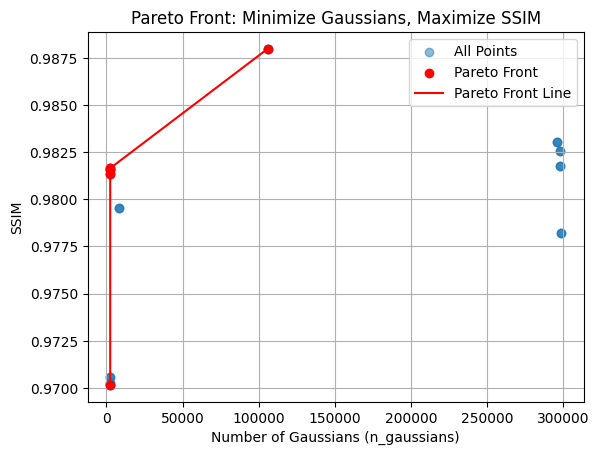

In [52]:
from paretoset import paretoset
# Step 4: Use the paretoset package to compute the Pareto front (maximize SSIM, minimize n_gaussians)
mask = paretoset(df_results[['ssim', 'n_gaussians']], sense=['max', 'min'])

# Extract the Pareto front from the results
pareto_df = df_results[mask]

# Step 4.1: Sort the Pareto front by n_gaussians (or ssim if you prefer)
pareto_df = pareto_df.sort_values(by='n_gaussians')

# Step 5: Plot the Pareto front and all points
plt.scatter(df_results['n_gaussians'], df_results['ssim'], label='All Points', alpha=0.5)
plt.scatter(pareto_df['n_gaussians'], pareto_df['ssim'], color='red', label='Pareto Front', zorder=2)

# Step 6: Plot a line connecting the Pareto front points
plt.plot(pareto_df['n_gaussians'], pareto_df['ssim'], color='red', linestyle='-', label='Pareto Front Line')

plt.title('Pareto Front: Minimize Gaussians, Maximize SSIM')
plt.xlabel('Number of Gaussians (n_gaussians)')
plt.ylabel('SSIM')
plt.legend()
plt.grid(True)
plt.show()